In [1]:
import warnings
warnings.filterwarnings("ignore")
from env import user, host,password
def get_connection(schema,
                   user=user,
                   host=host,
                   password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{schema}'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from pydataset import data

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
titanic = pd.read_csv(csv_export_url)
titanic.columns = [col.lower().replace('.', '_') for col in titanic]
titanic = titanic.drop(columns=['name'])
titanic.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train, test = train_test_split(titanic, 
                               stratify=titanic['survived'], 
                               train_size=0.8, 
                               random_state=1729)
train, validate = train_test_split(train, 
                                   stratify=train['survived'], 
                                   train_size=0.7, 
                                   random_state=1729)

In [4]:
col_drop = ['sex','ticket','cabin','embarked','age', 'parch', 'pclass']

In [5]:
X_train = train.drop(columns = col_drop)
y_train = train.survived
X_validate = validate.drop(columns = col_drop)
y_validate = validate.survived
X_test = test.drop(columns = col_drop)
y_test = test.survived

<AxesSubplot:xlabel='parch', ylabel='pclass'>

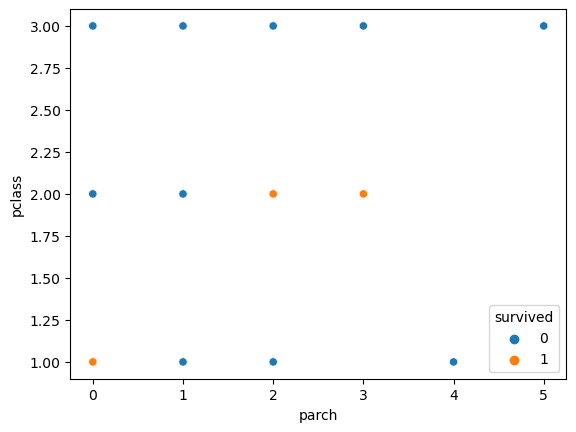

In [6]:
sns.scatterplot(data = train,x='parch',y='pclass',hue='survived')

In [7]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
y_pred = knn.predict(X_train)

In [9]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [10]:
knn.score(X_train,y_train)

1.0

In [11]:
confusion_matrix(y_train,y_pred)

array([[307,   0],
       [  0, 191]])

In [12]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       191

    accuracy                           1.00       498
   macro avg       1.00      1.00      1.00       498
weighted avg       1.00      1.00      1.00       498



In [ ]:
def get_metrics(y, y_pred):
    TN, FP, FN, TP = confusion_matrix(y, y_pred).ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)
    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))
    support_0 = train[train.survived == 0].shape[0]
    support_1 = train[train.survived == 1].shape[0]
    print(f'''
    Accuracy: {accuracy}
    True Positive Rate: {TPR}
    True Negative Rate: {TNR}
    False Positive Rate: {FPR}
    False Negative Rate: {FNR}
    Precision : {precision}
    f1 score: {f1}
    supports: 0: {support_0} 1: {support_1}
    ''')

In [ ]:
clf2=knn(n_neighbors=10)
clf2.fit(X_train,y_train)
clf2.score(X_train,y_train)

In [ ]:
clf3=knn(n_neighbors=20)
clf3.fit(X_train,y_train)
clf3.score(X_train,y_train)

In [ ]:
#fist model is better in sample, has better accuracy

In [ ]:
subset=['age','fare','pclass']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr =LogisticRegression()
lr.fit(X_train[subset],y_train)
lr.score(X_train[subset],y_train)

In [ ]:
lr2=LogisticRegression()
lr2.fit(X_train[subset],y_train)
lr2.score(X_train[subset],y_train)

In [ ]:
X_val,y_vals = val[X_cols], val[y_col]

In [ ]:
clf.score(X_val,y_val),clf2.score(X_val,y_val)